## Importing modules

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.metrics import confusion_matrix
import random
import string

## Getting dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Heatmap of correlation values

<AxesSubplot:>

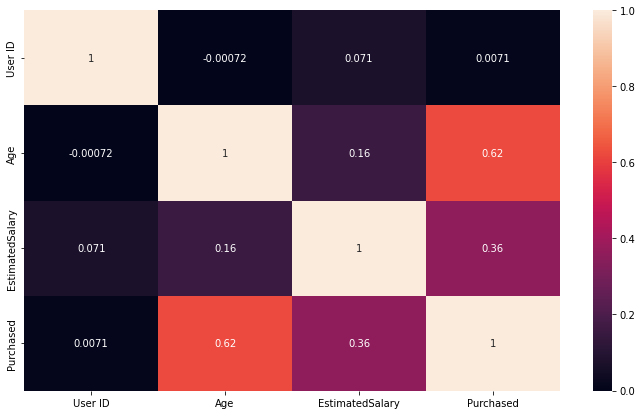

In [6]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Defining columns on which model to be trained

In [8]:
y = df['Purchased']

In [9]:
X = df[['Age', 'EstimatedSalary']]

In [10]:
from sklearn.model_selection import train_test_split

### Split dataset into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression

### Training model

In [13]:
lm = LogisticRegression()

In [14]:
lm.fit(X_train, y_train)

LogisticRegression()

In [15]:
lm.coef_

array([[-1.67557454e-02,  5.08378745e-06]])

In [16]:
pred = lm.predict(X_test)

### Confusion Matrix

In [23]:
cm = confusion_matrix(y_test, pred)
cm

array([[68, 13],
       [47,  4]])

<AxesSubplot:>

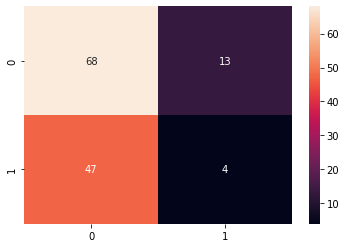

In [24]:
sns.heatmap(cm, annot=True)

### Accuracy

In [25]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print(accuracy)

0.5454545454545454


### Precision

In [26]:
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print(precision)

0.8395061728395061


### Error rate

In [27]:
errorrate = 1-accuracy
print(errorrate)

0.4545454545454546
